In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [316]:
# import OECD.csv and select features
oecd = pd.read_csv('data_source/OECD.csv')

oecd = oecd.loc[(oecd['Subject']=='Real effective exchange rates')
                |(oecd['Subject']=='Value added in financial and insurance activities')
                |(oecd['Subject']=='General government net lending')
                |(oecd['Subject']=='Households debt')
                |(oecd['Subject']=='CPI: all items')]
               #|(oecd['Subject']=='Inflows of foreign direct investment')
               #|(oecd['Subject']=='Trade balance of goods')
               #|(oecd['Subject']=='Trade balance of services')
               #|(oecd['Subject']=='Outflows of foreign direct investment')]
oecd = oecd[['Subject','Country','Year','Value']]

In [285]:
oecd['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Brazil', 'Chile',
       "China (People's Republic of)", 'Estonia', 'India', 'Israel',
       'Russia', 'Slovenia', 'South Africa', 'Latvia', 'Lithuania'],
      dtype=object)

In [317]:
# import gdp.csv/OECD
gdp = pd.read_csv('data_source/gdp.csv')
gdp = gdp.loc[gdp['MEASURE']=='VXVOB']
gdp = gdp[['Transaction','Country','Year','Value']]
gdp = gdp.rename(columns={'Transaction':'Subject'})

In [318]:
# import non-finance.csv and pick measure CXC in Non-financial corporations/OECD
nonfinance = pd.read_csv('data_source/non-finance.csv')
nonfinance = nonfinance.loc[(nonfinance['MEASURE']=='CXC') & (nonfinance['Sector']=='Non-financial corporations')]
nonfinance = nonfinance[['Transaction', 'Country', 'Time', 'Value']]
nonfinance = nonfinance.rename(columns={'Transaction':'Subject','Time':'Year'})

In [319]:
def oecd_combine(df):
    # drop unnecessary columns
    df = df.drop(['Unnamed: 0', 'Country Code', 'Indicator Code', 'V65'], axis=1)
    # change from wide to long format
    df = df.pivot_table(index='Country Name', columns='Indicator Name').unstack().reset_index()
    # rename columns
    df = df.rename(columns={'level_0':'Year', 'Indicator Name':'Subject',
                                       'Country Name':'Country', 0:'Value'})
    convert_dict = {'Year': int, 
                'Value': float
               } 
  
    df = df.astype(convert_dict)
    df['Country'] = df['Country'].str.replace('Russian Federation', 'Russia')
    df['Country'] = df['Country'].str.replace('Korea, Rep.', 'Korea')
    df['Country'] = df['Country'].str.replace('China', "China (People's Republic of)")
    
    return df

In [320]:
# from World Bank
fdi_inflow = pd.read_csv('data_source/inflow.csv')
fdi_inflow = oecd_combine(fdi_inflow)

In [321]:
fdi_outflow = pd.read_csv('data_source/outflow.csv')
fdi_outflow = oecd_combine(fdi_outflow)

In [322]:
net_finance = pd.read_csv('data_source/netfinance.csv')
net_finance = oecd_combine(net_finance)

In [323]:
trade_balance = pd.read_csv('data_source/netgoodservices.csv')
trade_balance = oecd_combine(trade_balance)

In [324]:
m2 = pd.read_csv('data_source/broad_money.csv')
m2 = oecd_combine(m2)

In [325]:
domestic_credit = pd.read_csv('data_source/domestic_credit.csv')
domestic_credit = oecd_combine(domestic_credit)

In [326]:
# append to oecd 
oecd_full = oecd.append([gdp, nonfinance, fdi_inflow, fdi_outflow, net_finance, trade_balance, m2, domestic_credit])

In [327]:
oecd_full = oecd_full.sort_values(by=['Country', 'Subject', 'Year'])

In [15]:
oecd_full.head()

,Country,Subject,Value,Year
0,Afghanistan,Broad money (% of GDP),13.450412,1960
209,Afghanistan,Broad money (% of GDP),14.534413,1961
418,Afghanistan,Broad money (% of GDP),17.195122,1962
627,Afghanistan,Broad money (% of GDP),14.464496,1963
836,Afghanistan,Broad money (% of GDP),16.688888,1964


In [16]:
oecd_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84032 entries, 0 to 11681
Data columns (total 4 columns):
Country    84032 non-null object
Subject    84032 non-null object
Value      64740 non-null float64
Year       84032 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [328]:
temp = oecd_full.pivot_table(values='Value', index=['Country', 'Year'], columns=['Subject']).reset_index()

In [18]:
temp

Subject,Country,Year,Broad money (% of GDP),CPI: all items,Domestic credit provided by financial sector (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net outflows (% of GDP)",General government net lending,Gross domestic product (output approach),Households debt,"Net financial flows, IDA (NFL, current US$)",Net financial transactions,"Net trade in goods and services (BoP, current US$)",Real effective exchange rates,Value added in financial and insurance activities
0,Afghanistan,1960,13.450412,NaN,15.727272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,14.534413,NaN,20.072874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,17.195122,NaN,21.276422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,14.464496,NaN,17.005915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,16.688888,NaN,20.424999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,Zimbabwe,2014,22.451986,NaN,27.816562,2.425173,2.794488,NaN,NaN,NaN,NaN,NaN,-4.141642e+09,NaN,NaN
13131,Zimbabwe,2015,23.724442,NaN,31.708219,1.999687,2.108889,NaN,NaN,NaN,NaN,NaN,-3.539703e+09,NaN,NaN
13132,Zimbabwe,2016,27.438656,NaN,36.408268,1.669274,1.809413,NaN,NaN,NaN,NaN,NaN,-2.367022e+09,NaN,NaN
13133,Zimbabwe,2017,34.266757,NaN,46.890592,1.083538,1.531668,NaN,NaN,NaN,NaN,NaN,-1.844432e+09,NaN,NaN


In [329]:
oecd_country = temp.loc[(temp['Country']=='Australia')|(temp['Country']=='Austria')|
                       (temp['Country']=='Belgium')|(temp['Country']=='Canada')|
                       (temp['Country']=='Chile')|(temp['Country']=='Czech Republic')|
                       (temp['Country']=='Denmark')|(temp['Country']=='Estonia')|
                       (temp['Country']=='Finland')|(temp['Country']=='France')|
                       (temp['Country']=='Germany')|(temp['Country']=='Greece')|
                       (temp['Country']=='Hungary')|(temp['Country']=='Iceland')|
                       (temp['Country']=='Ireland')|(temp['Country']=='Israel')|
                       (temp['Country']=='Italy')|(temp['Country']=='Japan')|
                       (temp['Country']=='Korea')|(temp['Country']=='Latvia')|
                       (temp['Country']=='Lithuania')|(temp['Country']=='Luxembourg')|
                       (temp['Country']=='Mexico')|(temp['Country']=='Netherlands')|
                       (temp['Country']=='New Zealand')|(temp['Country']=='Norway')|
                       (temp['Country']=='Poland')|(temp['Country']=='Portugal')|
                       (temp['Country']=='Slovak Republic')|(temp['Country']=='Slovenia')|
                       (temp['Country']=='Spain')|(temp['Country']=='Sweden')|
                       (temp['Country']=='Switzerland')|(temp['Country']=='Turkey')|
                       (temp['Country']=='United Kingdom')|(temp['Country']=='United States')|
                       (temp['Country']=="China (People's Republic of)")|(temp['Country']=='Russia')|
                       (temp['Country']=='India')|(temp['Country']=='Brazil')|
                       (temp['Country']=='South Africa')]

In [20]:
oecd_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 487 to 12563
Data columns (total 15 columns):
Country                                                    2379 non-null object
Year                                                       2379 non-null int64
Broad money (% of GDP)                                     1238 non-null float64
CPI: all items                                             2149 non-null float64
Domestic credit provided by financial sector (% of GDP)    1510 non-null float64
Foreign direct investment, net inflows (% of GDP)          1750 non-null float64
Foreign direct investment, net outflows (% of GDP)         1750 non-null float64
General government net lending                             1000 non-null float64
Gross domestic product (output approach)                   1777 non-null float64
Households debt                                            696 non-null float64
Net financial flows, IDA (NFL, current US$)                1066 non-null float64
Net

In [21]:
oecd_country['Country'].nunique()

41

In [330]:
oecd_country = oecd_country.rename(columns={"CPI: all items": "C_cpi", 
                     "Foreign direct investment, net inflows (% of GDP)": "C_fdi_inflow%", 
                     "Foreign direct investment, net outflows (% of GDP)": "C_fdi_outflow%",
                     "General government net lending": "IV_lending",
                     "Gross domestic product (output approach)": "C_gdp",
                     "Households debt": "DV_debt",
                     "Real effective exchange rates": "C_REER",
                     "Value added in financial and insurance activities": "DV_VA",
                     "Net financial transactions": "DV_nonfinance",
                     "Net financial flows, IDA (NFL, current US$)": "C_NFL",
                     "Net trade in goods and services (BoP, current US$)": "IV_trade_balance",
                     "Broad money (% of GDP)": "C_M2",
                     "Domestic credit provided by financial sector (% of GDP)": "DV_domestic_credit"
                                           })

In [24]:
oecd_country.head()

Subject,Country,Year,C_M2,C_cpi,DV_domestic_credit,C_fdi_inflow%,C_fdi_outflow%,IV_lending,C_gdp,DV_debt,C_NFL,DV_nonfinance,IV_trade_balance,C_REER,DV_VA
487,Australia,1950,NaN,8.695652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,Australia,1951,NaN,19.428570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,Australia,1952,NaN,17.224880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,Australia,1953,NaN,4.489796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,Australia,1954,NaN,1.562500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


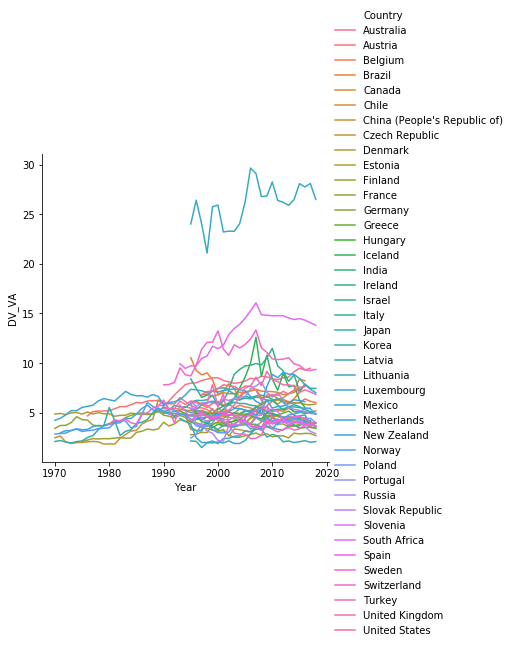

In [58]:
sns.relplot(data = oecd_country, x='Year', y='DV_VA', hue='Country',kind='line')

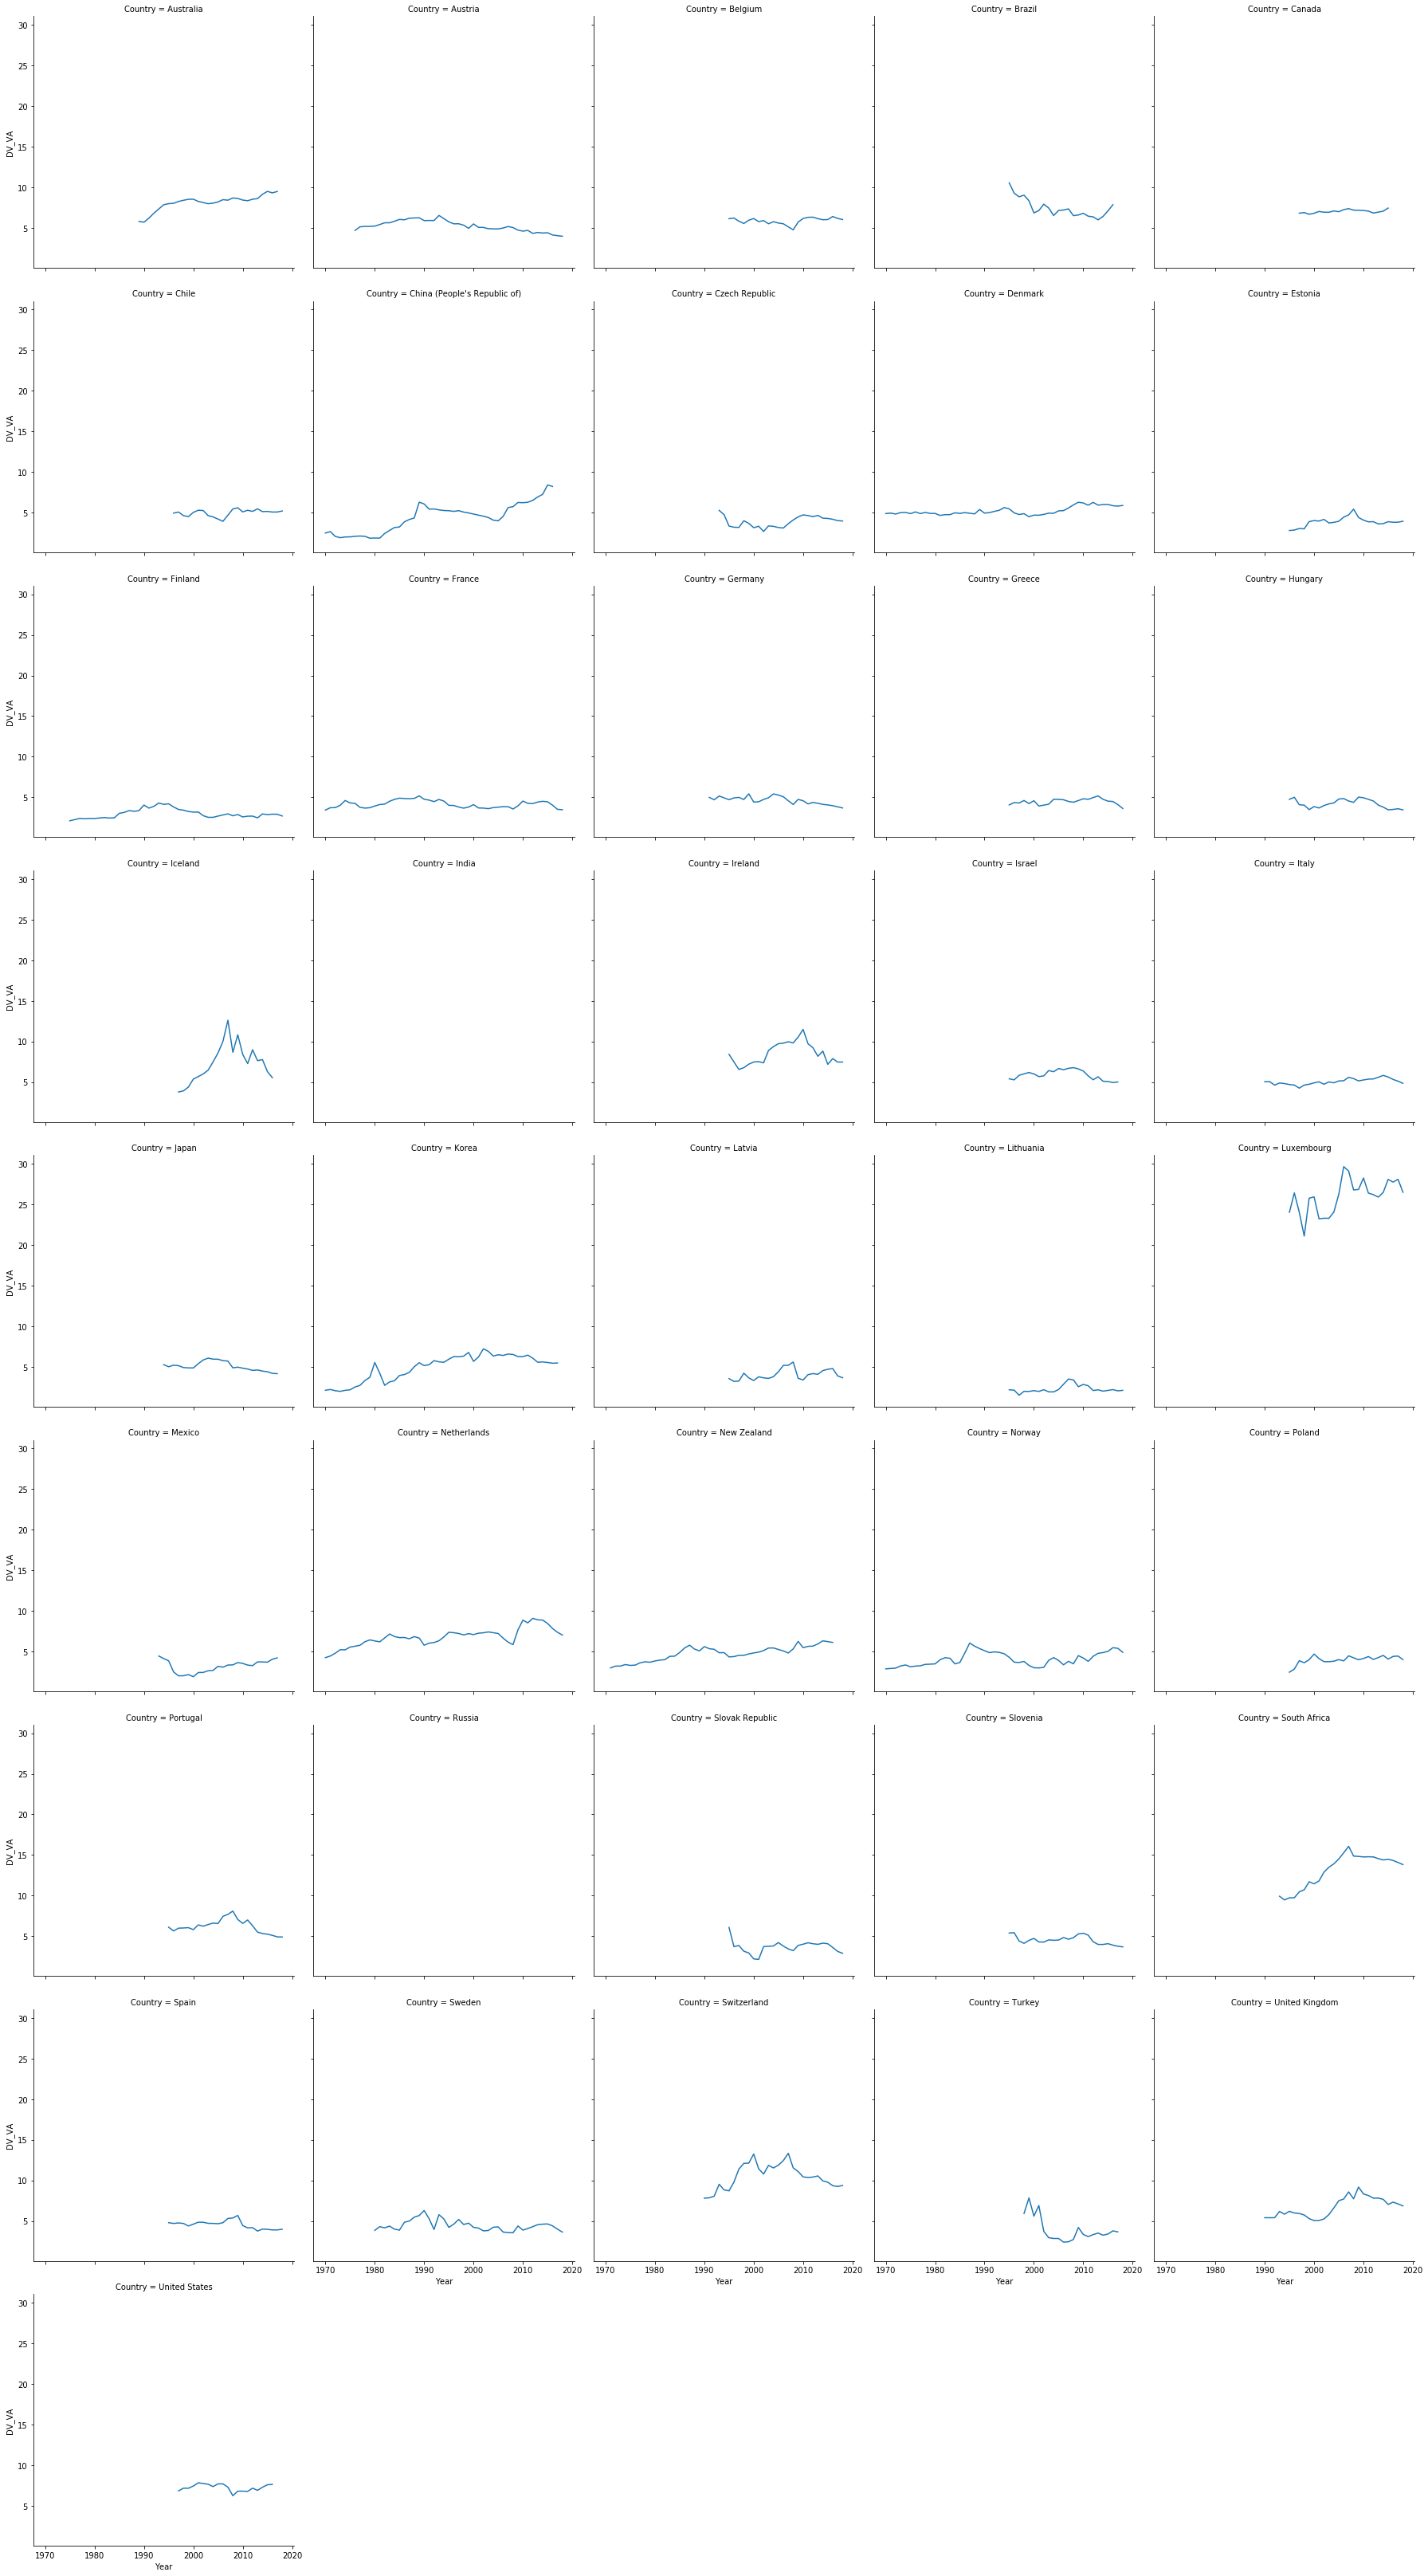

In [59]:
sns.relplot(data = oecd_country, x='Year', y='DV_VA', col='Country',kind='line',col_wrap=5)

In [331]:
oecd_percent = oecd_country
# get percent change of CPI
oecd_percent['C_cpiplus']=oecd_country['C_cpi'].pct_change()

In [332]:
oecd_percent['C_gdpplus']=oecd_percent['C_gdp'].pct_change()

In [333]:
oecd_percent['DV_nonfinanceplus']=oecd_percent['DV_nonfinance'].pct_change()

In [335]:
oecd_percent['C_m2plus']=oecd_percent['C_M2'].pct_change()

In [336]:
oecd_percent['C_cpiplus'] = np.log(oecd_percent['C_cpiplus']+1)
oecd_percent['C_m2plus'] = np.log(oecd_percent['C_m2plus']+0.3)

In [337]:
oecd_percent_corr = oecd_percent.groupby('Country').corr()
oecd_percent_corr.to_csv('data_processing/oecd_percent_corr.csv')
oecd_percent.to_csv('data_processing/oecd_percent.csv')

In [338]:
oecd_percent_corr

Subject                               Year      C_M2     C_cpi  \
Country       Subject                                            
Australia     Year                1.000000  0.872574 -0.327081   
              C_M2                0.872574  1.000000 -0.514815   
              C_cpi              -0.327081 -0.514815  1.000000   
              DV_domestic_credit  0.913088  0.991485 -0.484346   
              C_fdi_inflow%       0.516924  0.531339 -0.327293   
...                                    ...       ...       ...   
United States DV_VA              -0.129476 -0.303418 -0.015956   
              C_cpiplus           0.010273 -0.001365  0.171617   
              C_gdpplus          -0.056700 -0.124636  0.114211   
              DV_nonfinanceplus        NaN       NaN       NaN   
              C_m2plus            0.048389  0.164028 -0.126505   

Subject                           DV_domestic_credit  C_fdi_inflow%  \
Country       Subject                                                 
Australia     Year                          0.913088       0.516924   
              C_M2                          0.991485       0.531339   
              C_cpi                        -0.484346      -0.327293   
              DV_domestic_credit            1.000000       0.546823   
              C_fdi_inflow%                 0.546823       1.000000   
...                                              ...            ...   
United States DV_VA                        -0.184980      -0.020228   
              C_cpiplus                     0.023983       0.080370   
              C_gdpplus                    -0.115101      -0.187602   
              DV_nonfinanceplus                  NaN            NaN   
              C_m2plus                      0.143718       0.180051   

Subject                           C_fdi_outflow%  IV_lending     C_gdp  \
Country       Subject                                                    
Australia     Year                     -0.165244    0.306341  0.977491   
              C_M2                     -0.184172    0.286850  0.946026   
              C_cpi                     0.134193   -0.376243 -0.373498   
              DV_domestic_credit       -0.170767    0.256436  0.969518   
              C_fdi_inflow%             0.482935    0.172405  0.520067   
...                                          ...         ...       ...   
United States DV_VA                    -0.417060    0.460247 -0.047369   
              C_cpiplus                 0.074421    0.072444  0.054620   
              C_gdpplus                -0.133119    0.120698 -0.255507   
              DV_nonfinanceplus              NaN         NaN       NaN   
              C_m2plus                  0.197422    0.110070  0.098348   

Subject                            DV_debt  C_NFL  DV_nonfinance  \
Country       Subject                                              
Australia     Year                0.950330    NaN      -0.443529   
              C_M2                0.914932    NaN      -0.429123   
              C_cpi              -0.119506    NaN       0.047911   
              DV_domestic_credit  0.920654    NaN      -0.449481   
              C_fdi_inflow%       0.290576    NaN      -0.265975   
...                                    ...    ...            ...   
United States DV_VA              -0.147056    NaN            NaN   
              C_cpiplus           0.060382    NaN            NaN   
              C_gdpplus          -0.481495    NaN            NaN   
              DV_nonfinanceplus        NaN    NaN            NaN   
              C_m2plus            0.149235    NaN            NaN   

Subject                           IV_trade_balance    C_REER     DV_VA  \
Country       Subject                                                    
Australia     Year                       -0.086213 -0.158702  0.841945   
              C_M2                       -0.083812  0.070420  0.786611   
              C_cpi                       0.058385  0.443785 -0.555295   

In [31]:
oecd_percent.head()

Subject,Country,Year,C_M2,C_cpi,DV_domestic_credit,C_fdi_inflow%,C_fdi_outflow%,IV_lending,C_gdp,DV_debt,C_NFL,DV_nonfinance,IV_trade_balance,C_REER,DV_VA,C_cpiplus,C_gdpplus,DV_nonfinanceplus
487,Australia,1950,NaN,8.695652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,Australia,1951,NaN,19.428570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803922,NaN,NaN
489,Australia,1952,NaN,17.224880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.120390,NaN,NaN
490,Australia,1953,NaN,4.489796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.344548,NaN,NaN
491,Australia,1954,NaN,1.562500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.055520,NaN,NaN


In [32]:
oecd_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 487 to 12563
Data columns (total 18 columns):
Country               2379 non-null object
Year                  2379 non-null int64
C_M2                  1238 non-null float64
C_cpi                 2149 non-null float64
DV_domestic_credit    1510 non-null float64
C_fdi_inflow%         1750 non-null float64
C_fdi_outflow%        1750 non-null float64
IV_lending            1000 non-null float64
C_gdp                 1777 non-null float64
DV_debt               696 non-null float64
C_NFL                 1066 non-null float64
DV_nonfinance         625 non-null float64
IV_trade_balance      1559 non-null float64
C_REER                1679 non-null float64
DV_VA                 1167 non-null float64
C_cpiplus             2278 non-null float64
C_gdpplus             2369 non-null float64
DV_nonfinanceplus     2339 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 353.1+ KB


In [339]:
# observe null values and zero values in each variable
def missing_val(col, df):
    df_zero = df[df[col]==0].groupby(['Country']).min().iloc[:,:1]
    if df_zero.empty == True: 
        df_null = pd.DataFrame(df[df[col].isnull()].groupby('Country')['Year'].first())
        df_null['End-Year'] = df[df[col].isnull()].groupby('Country')['Year'].last()
        df_null['Count'] = df[df[col].isnull()].groupby('Country')['Year'].count()
        col_missing = df_null
    else:
        df_zero['End-Year'] = df[df[col]==0].groupby(['Country']).max().iloc[:,:1]
        df_zero['Count'] = df[df[col]==0].groupby(['Country']).count().iloc[:,:1]
        df_null = pd.DataFrame(df[df[col].isnull()].groupby('Country')['Year'].first())
        df_null['End-Year'] = df[df[col].isnull()].groupby('Country')['Year'].last()
        df_null['Count'] = df[df[col].isnull()].groupby('Country')['Year'].count()
        col_missing = df_zero.append(df_null)
    
    return col_missing

In [340]:
def missing_val_save(df):
    # print out each variable's missing values
    for i in range(df.shape[1]-2):
        print(df.columns[2:][i], missing_val(df.columns[2:][i], df))
    # save each variable's missing values to .csv 
    for i in df.columns[2:]:
        pd.DataFrame(df[df[i].isnull()].groupby(['Country','Year']).size()).to_csv('data_missing/{}_missing.csv'.format(i))

In [341]:
missing_val_save(oecd_percent)

C_M2                               Year  End-Year  Count
Country                                            
Australia                     1950      1959     10
Austria                       1959      2018     60
Belgium                       1956      2018     63
Canada                        1950      2018     20
Chile                         1960      1960      1
China (People's Republic of)  1970      1976      7
Czech Republic                1970      1992     23
Estonia                       1970      2018     49
Finland                       1956      2018     63
France                        1951      2018     68
Germany                       1956      2018     63
Greece                        1956      2018     63
Hungary                       1981      1990     10
Iceland                       1956      1959      4
India                         1951      1959      9
Ireland                       1970      2018     49
Italy                         1956      2018     63
Japan  

IV_trade_balance                               Year  End-Year  Count
Country                                            
Australia                     1950      1988     39
Austria                       1959      2004     46
Belgium                       1956      2001     46
Brazil                        1960      1974     15
Canada                        1950      1959     10
Chile                         1960      1974     15
China (People's Republic of)  1970      1981     12
Czech Republic                1970      1992     23
Denmark                       1966      1974      9
Estonia                       1970      1991     22
Finland                       1956      1974     19
France                        1951      1974     24
Germany                       1956      1970     15
Greece                        1956      1998     21
Hungary                       1981      1981      1
Iceland                       1956      1975     20
India                         1951      1974   

## Global Debt Database (GDD)
The database is downloaded from here: https://www.imf.org/external/datamapper/datasets/GDD

Variable Name Introduction 
- pvd_all: private debt, all instruments 
- pvd_ls: private debt, loans and debt securities 
- hh_all: household debt, all instruments 
- hh_ls: houshold debt, loans and debt securities 
- nfc_all: nonfinancial corporate debt, all instruments 
- nfc_ls: nonfinancial corporate debt, loans and debt securities 
- ps: public sector debt 
- nfps: nonfinancial public sector debt 
- gg: general government debt 
- cg: central government debt 
- ngdp: Unsure, maybe “national gdp” 

In [342]:
global_debt = pd.read_csv('data_source/global_debt_database.csv')

In [115]:
global_debt.head()

,Unnamed: 0,ifscode,country,year,pvd_all,pvd_ls,hh_all,hh_ls,nfc_all,nfc_ls,ps,nfps,gg,cg,ngdp
0,1,111,United States,1950,75.826082,55.314634,25.482242,24.802614,50.343839,30.512020,NaN,NaN,83.126037,78.199645,301.782705
1,2,111,United States,1951,72.692564,53.657228,24.518253,23.911650,48.174311,29.745577,NaN,NaN,72.955032,68.201929,348.993057
2,3,111,United States,1952,74.282425,56.555505,26.598532,25.976296,47.683893,30.579209,NaN,NaN,72.525492,66.341449,368.027836
3,4,111,United States,1953,75.037319,58.016532,28.427253,27.794074,46.610066,30.222458,NaN,NaN,71.753219,64.602206,389.147698
4,5,111,United States,1954,79.868981,62.573558,31.539677,30.862721,48.329304,31.710837,NaN,NaN,73.568066,64.955715,390.276672


In [343]:
# clean global_debt dataframe
def global_debt_transform(df):
    df = df.drop(['Unnamed: 0', 'ifscode', 'pvd_all', 'hh_all', 'nfc_all', 'ps', 'nfps'], axis=1)
    # rename columns
    df = df.rename(columns={'year':'Year', 'country':'Country', 
                                       })
    # change country name
    df['Country'] = df['Country'].str.replace('Russian Federation', 'Russia')
    df['Country'] = df['Country'].str.replace('Korea, Republic of', 'Korea')
    df['Country'] = df['Country'].str.replace('China, Mainland', "China (People's Republic of)")
    
    # select country
    df = df[df['Country'].isin(['Australia', 'Austria', 
       'Belgium', 'Brazil', 'Canada', 'Chile',
       "China (People's Republic of)", 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'])]
    
    return df

In [344]:
global_debt = global_debt_transform(global_debt)

In [118]:
global_debt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2829 entries, 0 to 12971
Data columns (total 8 columns):
Country    2829 non-null object
Year       2829 non-null int64
pvd_ls     1985 non-null float64
hh_ls      1415 non-null float64
nfc_ls     1399 non-null float64
gg         1571 non-null float64
cg         2099 non-null float64
ngdp       2519 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 198.9+ KB


In [152]:
missing_val_save(global_debt)

pvd_ls                               Year  End-Year  Count
Country                                            
Australia                     1950      1952      3
Belgium                       1950      1969     20
Brazil                        1950      1992     43
Canada                        1950      1953      4
Chile                         1950      1982     33
China (People's Republic of)  1950      1984     35
Czech Republic                1950      2018     47
Denmark                       1950      1950      1
Estonia                       1950      1991     42
Finland                       1950      1969     20
France                        1950      1968     19
Greece                        1950      1959     10
Hungary                       1950      1968     19
Iceland                       1950      1950      1
India                         1950      1950      1
Ireland                       1950      1970     21
Israel                        1950      1991     42
Japan

In [345]:
oecd_percent = oecd_percent.append([global_debt])
oecd_percent.head()

,C_M2,C_NFL,C_REER,C_cpi,C_cpiplus,C_fdi_inflow%,C_fdi_outflow%,C_gdp,C_gdpplus,C_m2plus,...,DV_nonfinanceplus,IV_lending,IV_trade_balance,Year,cg,gg,hh_ls,nfc_ls,ngdp,pvd_ls
487,NaN,NaN,NaN,8.695652,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1950,NaN,NaN,NaN,NaN,NaN,NaN
488,NaN,NaN,NaN,19.428570,0.803922,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1951,NaN,NaN,NaN,NaN,NaN,NaN
489,NaN,NaN,NaN,17.224880,-0.120390,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1952,NaN,NaN,NaN,NaN,NaN,NaN
490,NaN,NaN,NaN,4.489796,-1.344548,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1953,NaN,NaN,NaN,NaN,NaN,NaN
491,NaN,NaN,NaN,1.562500,-1.055520,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1954,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
oecd_percent = oecd_percent.drop(['cg', 'gg', 'ngdp', 'DV_debt'], axis = 1)

In [347]:
oecd_percent = oecd_percent.rename(columns={'hh_ls': 'DV_hh_ls', 'pvd_ls': 'DV_pvd_ls'})

In [348]:
oecd_percent.columns

Index(['C_M2', 'C_NFL', 'C_REER', 'C_cpi', 'C_cpiplus', 'C_fdi_inflow%',
       'C_fdi_outflow%', 'C_gdp', 'C_gdpplus', 'C_m2plus', 'Country', 'DV_VA',
       'DV_domestic_credit', 'DV_nonfinance', 'DV_nonfinanceplus',
       'IV_lending', 'IV_trade_balance', 'Year', 'DV_hh_ls', 'nfc_ls',
       'DV_pvd_ls'],
      dtype='object')

In [351]:
oecd_percent = oecd_percent[['Country', 'Year', 'DV_VA', 'DV_domestic_credit', 
       'DV_pvd_ls', 'DV_nonfinance', 'DV_nonfinanceplus', 'nfc_ls', 'DV_hh_ls', 
       'IV_lending', 'IV_trade_balance', 
       'C_M2', 'C_m2plus', 'C_NFL', 'C_REER', 'C_cpi', 'C_cpiplus', 'C_fdi_inflow%',
       'C_fdi_outflow%', 'C_gdp', 'C_gdpplus']]

## Historical Public Finance Dataset
They have great visualization of debt. 
It is interesting to learn that the global debt is decreasing during most of the 1990s and the 2000s. 
link: http://data.imf.org/?sk=806ED027-520D-497F-9052-63EC199F5E63 
The database is available here: https://www.imf.org/external/np/fad/histdb/index.htm 
It also has a chartbook here:https://www.imf.org/external/pubs/ft/wp/2013/charts/wp1305_chartbk.pdf 

Variable Name Introduction 
- rev: government revenue 
- exp: government expenditure, percent of GDP 
- prim_exp: government primary expenditure, percent of GDP 
- ie: Interest paid on public debt, percent of GDP 
- pb: government primary balance, percent of GDP 
- d: gross public debt, percent of GDP 
- rgc: real gdp growth rate, percent 
- rltirc: real long term government bond yield, percent 
- gg_debt: general government debt
- gg_budg: general government budget

In [128]:
public_finance = pd.read_csv('data_source/historical_public_finance_dataset.csv')

In [129]:
public_finance.head()

,code,country,year,rev,exp,prim_exp,ie,pb,d,rgc,rltirc,gg_debt,gg_budg
0,111,United States,1800,2.36362,2.34989,1.614600,0.735294,0.74902,18.0911,NaN,NaN,0,0
1,111,United States,1801,2.44981,1.77936,0.943560,0.835796,1.50625,15.2865,4.97677,NaN,0,0
2,111,United States,1802,3.06041,1.60449,0.762653,0.841837,2.29776,15.7255,4.82650,NaN,0,0
3,111,United States,1803,2.26721,1.60902,0.820287,0.788729,1.44693,17.7104,1.37583,NaN,0,0
4,111,United States,1804,2.21461,1.63277,0.833708,0.799064,1.38090,15.4142,3.00994,NaN,0,0


In [140]:
public_finance.country.unique()

array(['United States', 'United Kingdom', 'Austria', 'Belgium', 'Denmark',
       'France', 'Germany', 'Italy', 'Netherlands', 'Norway', 'Sweden',
       'Switzerland', 'Canada', 'Japan', 'Finland', 'Greece', 'Iceland',
       'Ireland', 'Portugal', 'Spain', 'Turkey', 'Australia',
       'New Zealand', 'South Africa', 'Argentina', 'Bolivia', 'Brazil',
       'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Haiti',
       'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Uruguay', 'Venezuela', 'Iran', 'Israel', 'Hong Kong', 'India',
       'Indonesia', 'South Korea', 'Pakistan', 'Philippines', 'Thailand',
       'Ghana', 'Bulgaria', 'Russian Federation', 'China', 'Hungary',
       'Poland', 'Romania'], dtype=object)

In [136]:
country = public_finance[public_finance.country.isin(['Australia', 'Austria', 
       'Belgium', 'Brazil', 'Canada', 'Chile',
       "China (People's Republic of)", 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'])].country.unique()

In [139]:
oecd_percent[~oecd_percent.Country.isin(list(country))].Country.unique()

array(["China (People's Republic of)", 'Czech Republic', 'Estonia',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Russia',
       'Slovak Republic', 'Slovenia'], dtype=object)

### These countries not included in the database: Czech, Estonia, Latvia, Lithuania, Luxembourg, Slovak, Slovenia

In [141]:
# clean public_finance dataframe
def public_finance_transform(df):
    df = df.drop(['code'], axis=1)
    # rename columns
    df = df.rename(columns={'year':'Year', 'country':'Country', 
                                       })
    # change country name
    df['Country'] = df['Country'].str.replace('Russian Federation', 'Russia')
    df['Country'] = df['Country'].str.replace('South Korea', 'Korea')
    df['Country'] = df['Country'].str.replace('China', "China (People's Republic of)")
    
    # select country
    df = df[df['Country'].isin(['Australia', 'Austria', 
       'Belgium', 'Brazil', 'Canada', 'Chile',
       "China (People's Republic of)", 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'])]
    
    return df

In [142]:
public_finance = public_finance_transform(public_finance)

In [143]:
public_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7208 entries, 0 to 11659
Data columns (total 12 columns):
Country     7208 non-null object
Year        7208 non-null int64
rev         3970 non-null float64
exp         3992 non-null float64
prim_exp    3461 non-null float64
ie          3515 non-null float64
pb          3479 non-null float64
d           4071 non-null float64
rgc         4593 non-null float64
rltirc      2128 non-null float64
gg_debt     7208 non-null int64
gg_budg     7208 non-null int64
dtypes: float64(8), int64(3), object(1)
memory usage: 732.1+ KB


In [154]:
missing_val_save(public_finance)

rev                               Year  End-Year  Count
Country                                            
Australia                     1800      1900    101
Austria                       1800      1947    101
Belgium                       1800      1945     56
Brazil                        1800      1995     89
Canada                        1800      1869     70
Chile                         1800      1809     10
China (People's Republic of)  1800      1981    182
Denmark                       1800      1879     80
Finland                       1800      1881     82
France                        1800      1945     82
Germany                       1800      1949    106
Greece                        1800      1947    101
Hungary                       1800      1994    178
Iceland                       1800      1908    109
India                         1800      1860     61
Ireland                       1800      1935    132
Israel                        1800      1974    154
Italy   

gg_budg                               Year  End-Year  Count
Country                                            
Australia                     1800      1959    160
Austria                       1800      1959    160
Belgium                       1800      1969    170
Brazil                        1800      1995    196
Canada                        1800      1960    161
Chile                         1800      2011    212
China (People's Republic of)  1800      2011    212
Denmark                       1800      1970    171
Finland                       1800      1974    175
France                        1800      2011    211
Germany                       1800      2011    211
Greece                        1800      2011    212
Hungary                       1800      2011    212
Iceland                       1800      1979    180
India                         1800      1987    188
Ireland                       1800      1959    160
Israel                        1800      1994    195
Ital

## WEO

In [252]:
weo = pd.read_csv('data_source/weo.csv', encoding = "ISO-8859-1")
weo.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,2018.0
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: National Statistics Office Latest actu...,NaN,...,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678,2018.0
2,512,AFG,NGDPRPPPPCPCH,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,3.063,2018.0
3,512,AFG,PCPIPCH,Afghanistan,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,4.451,2018.0
4,512,AFG,PCPIEPCH,Afghanistan,"Inflation, end of period consumer prices",Annual percentages of end of period consumer ...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,...,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.5,5,2018.0


In [163]:
weo['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Gui

In [164]:
weo_country = weo[weo.Country.isin(['Australia', 'Austria', 
       'Belgium', 'Brazil', 'Canada', 'Chile',
       "China (People's Republic of)", 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'])].Country.unique()

In [165]:
oecd_percent[~oecd_percent.Country.isin(list(weo_country))].Country.unique()

array(["China (People's Republic of)"], dtype=object)

In [250]:
# clean public_finance dataframe
def weo_transform(df):
    df = df.replace('--', 'NaN')
    df = df.drop(['WEO Country Code', 'ISO', 'WEO Subject Code', 
                 'Subject Notes', 'Units', 'Scale', 'Country/Series-specific Notes',
                 'Estimates Start After'], axis=1)
    
    # convert values from string to float
    for i in df.columns[2:]:
        df[i] = pd.to_numeric(df[i], errors = 'coerce')
    
    # transform wide to long format
    df = df.pivot_table(index = 'Country', columns = 'Subject Descriptor').unstack().reset_index()
    
    # rename columns
    df = df.rename(columns={'level_0':'Year', 'Subject Descriptor':'Subject', 0: 'Value'
                                       })
    # change country name
    df['Country'] = df['Country'].str.replace('China', "China (People's Republic of)")
    
    # select country
    df = df[df['Country'].isin(['Australia', 'Austria', 
       'Belgium', 'Brazil', 'Canada', 'Chile',
       "China (People's Republic of)", 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea',
       'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Russia',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States'])]
    
    df = df.pivot_table(values='Value', index=['Country', 'Year'], columns=['Subject']).reset_index()
    df = df.rename(columns={'General government net lending/borrowing': 'General government net lending_borrowing'})
    
    return df

In [253]:
weo = weo_transform(weo)

In [244]:
weo.head()

Subject,Country,Year,Current account balance,General government net lending/borrowing,"Gross domestic product per capita, constant prices","Gross domestic product, constant prices","Gross domestic product, current prices","Inflation, average consumer prices","Inflation, end of period consumer prices",Unemployment rate
0,Australia,1980,-2.371,NaN,1.593,2.894,155.502,10.136,NaN,6.133
1,Australia,1981,-4.064,NaN,2.483,4.127,177.239,9.488,NaN,5.783
2,Australia,1982,-4.114,NaN,-1.572,0.063,188.308,11.352,NaN,7.183
3,Australia,1983,-3.153,NaN,-1.724,-0.474,194.757,10.039,NaN,9.967
4,Australia,1984,-4.154,NaN,5.031,6.346,214.590,3.960,NaN,8.967


In [254]:
missing_val_save(weo)

Current account balance                               Year End-Year  Count
Country                                           
China (People's Republic of)  1980     1996     17
Luxembourg                    1980     1994     15
Russia                        1991     1991      1
General government net lending_borrowing                               Year End-Year  Count
Country                                           
Australia                     1980     1987      8
Austria                       1980     1987      8
Brazil                        1980     1995     16
Chile                         1980     1989     10
China (People's Republic of)  1980     1981      2
Estonia                       1993     1994      2
Germany                       1980     1990     11
Hungary                       1980     1994     15
India                         1980     1987      8
Ireland                       1980     1994     15
Israel                        1980     1999     20
Italy            

# Model

- delete Luxemberg


- DV_VA 和 DV_domestic_credit选择一个


- 增加一个government expenditure作为IV + IV_lending作为IV, 如果开支很大就需要通过金融化来缓解压力(statecraft)
- 增加一个fdi outflow可以作为IV + IV_trade_balance, 对外大量投资的时候有保持货币强势的需求(hegemony)


- 金融/银行国家 dummy variable(待定)
- 前苏联国家 post-socialism dummy variable